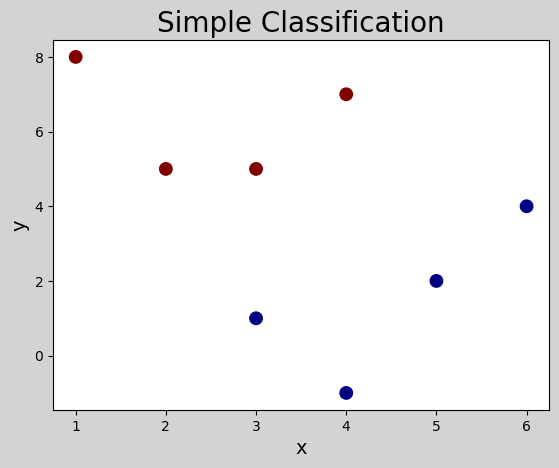

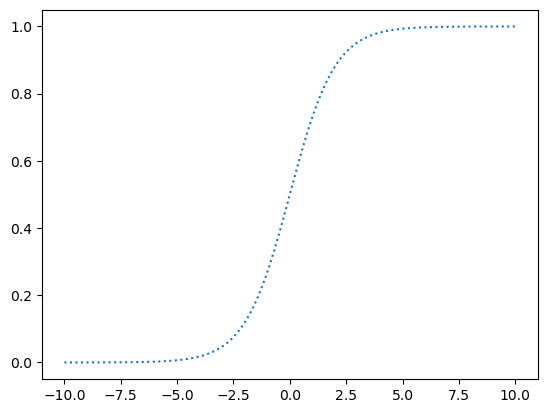

In [1]:
###分类问题
# Ridge 岭回归 就是L2正则化 权重平方和 * 系数
# Lasso 套索回归 就是L1正则化 权重绝对值和 * 系数

import numpy as np
import matplotlib.pyplot as plt
x = np.array([
    [3, 1],
    [2, 5],
    [1, 8],
    [6, 4],
    [5, 2],
    [3, 5],
    [4, 7],
    [4, -1],
])

y = np.array([0, 1, 1, 0, 0, 1, 1, 0])
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1

n = 500
xs, ys = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
# zs = np.piecewise(xs, [xs > ys, xs < ys], [1, 0])
plt.figure("Simple Classification Figure", facecolor='lightgray')
plt.title("Simple Classification", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.tick_params(labelsize=10)
# plt.pcolormesh(xs, ys, zs, cmap='gray')
plt.scatter(x[:, 0], x[:, 1], c=y, s=80, cmap='jet')
plt.show()

plt.figure()
xx = np.linspace(-10, 10, 1000)
yy = 1 / (1 + np.exp(-xx))
plt.plot(xx, yy, ':')
plt.show()

[[-0.70474861  0.9377823 ]] [-1.05790209]
r2 score 1.0
mean_square_error 0.0
y pred [0 1 1 0 0 1 1 0]
y pred prob [[0.90329339 0.09670661]
 [0.09783525 0.90216475]
 [0.00320572 0.99679428]
 [0.82277528 0.17722472]
 [0.93738449 0.06261551]
 [0.17993859 0.82006141]
 [0.06371025 0.93628975]
 [0.99195541 0.00804459]]
X: (250000, 2)
zs: (250000,)


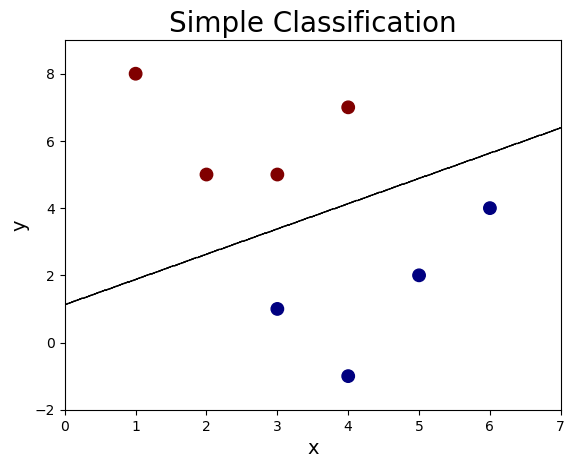

In [2]:
### 逻辑回归 -- 是分类功能!!!

import sklearn.metrics as sm
from sklearn.linear_model import LogisticRegression

x = np.array([
    [3, 1],
    [2, 5],
    [1, 8],
    [6, 4],
    [5, 2],
    [3, 5],
    [4, 7],
    [4, -1],
])

y = np.array([0, 1, 1, 0, 0, 1, 1, 0])

## solver 逻辑函数中指数的函数关系(看作优化器就好,最下面有介绍)
## C 正则强度,防止过拟合
model = LogisticRegression(solver='lbfgs', C=1.0)
model.fit(x, y)

print(model.coef_, model.intercept_)

y_pred = model.predict(x)
print('r2 score', sm.r2_score(y, y_pred))
print('mean_square_error', sm.mean_squared_error(y, y_pred))
print('y pred',y_pred)
## 返回(n, 2)的数组, n代表样本数, 2代表[0的预测概率, 1的预测概率]
print('y pred prob', model.predict_proba(x))


n = 500
xs, ys = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
X = np.column_stack((xs.flatten(), ys.flatten()))
print('X:', X.shape)
zs = model.predict(X)
print('zs:', zs.shape)
zs = zs.reshape(-1, n)

plt.figure("Simple Classification Figure")
plt.title("Simple Classification", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.tick_params(labelsize=10)
# plt.pcolormesh(xs, ys, zs, cmap='gray')
## 等高线图,比图片填充高效!!!
plt.contour(xs, ys, zs, linewidths=.5, colors='k')
plt.scatter(x[:, 0], x[:, 1], c=y, s=80, cmap='jet')
plt.show()

In [3]:
aa = np.linspace(-10, 10, 10)
bb = np.linspace(-10, 10, 10)
cc = np.column_stack((aa.ravel(), bb.ravel()))
aa.ravel(), bb.ravel(), cc
dd = np.hstack((aa.ravel(), bb.ravel()))
cc, dd

(array([[-10.        , -10.        ],
        [ -7.77777778,  -7.77777778],
        [ -5.55555556,  -5.55555556],
        [ -3.33333333,  -3.33333333],
        [ -1.11111111,  -1.11111111],
        [  1.11111111,   1.11111111],
        [  3.33333333,   3.33333333],
        [  5.55555556,   5.55555556],
        [  7.77777778,   7.77777778],
        [ 10.        ,  10.        ]]),
 array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
         -1.11111111,   1.11111111,   3.33333333,   5.55555556,
          7.77777778,  10.        , -10.        ,  -7.77777778,
         -5.55555556,  -3.33333333,  -1.11111111,   1.11111111,
          3.33333333,   5.55555556,   7.77777778,  10.        ]))

模型准确率: 0.8933333333333333

前 10 个样本的预测概率:
    样本ID  真实标签  预测标签     不购买概率      购买概率
0     0     1     1  0.020201  0.979799
1     1     0     0  0.949801  0.050199
2     2     0     0  0.864376  0.135624
3     3     1     1  0.002433  0.997567
4     4     0     0  0.954856  0.045144
5     5     0     0  0.960340  0.039660
6     6     1     0  0.881547  0.118453
7     7     1     1  0.079517  0.920483
8     8     1     0  0.599371  0.400629
9     9     0     0  0.928960  0.071040


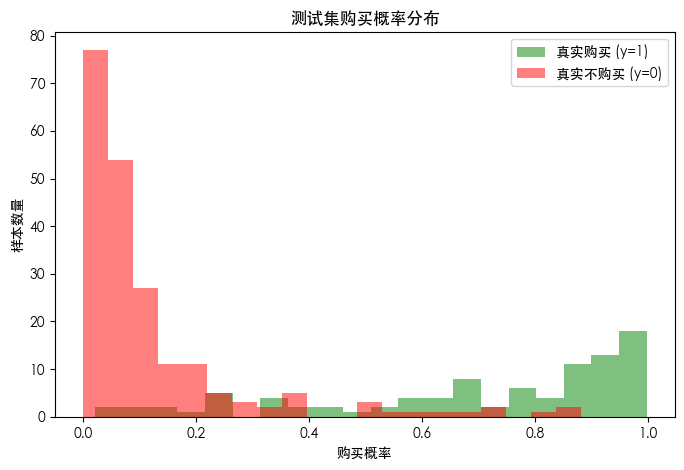

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

# 1. 生成模拟数据集
X, y = make_classification(
    n_samples=1000,           # 1000 个样本
    n_features=3,             # 3 个特征
    n_informative=2,          # 2 个有效特征
    n_redundant=1,            # 1 个冗余特征
    n_classes=2,              # 二分类
    weights=[0.7, 0.3],       # 30% 购买
    random_state=42
)

# 创建 DataFrame，命名特征
features = ['年龄', '收入', '浏览时间']
df = pd.DataFrame(X, columns=features)
df['是否购买'] = y

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 训练逻辑回归模型
model = LogisticRegression(
    penalty='l2',             # L2 正则化
    C=1.0,                   # 默认正则化强度
    solver='lbfgs',          # 优化器
    random_state=42
)
model.fit(X_train, y_train)

# 4. 获取预测类别和概率
y_pred = model.predict(X_test)               # 预测类别
y_prob = model.predict_proba(X_test)         # 预测概率

# 5. 评估模型
accuracy = accuracy_score(y_test, y_pred)
print("模型准确率:", accuracy)

# 6. 显示前几个样本的预测概率
prob_df = pd.DataFrame({
    '样本ID': range(len(y_test))[:10],
    '真实标签': y_test[:10],
    '预测标签': y_pred[:10],
    '不购买概率': y_prob[:10, 0],
    '购买概率': y_prob[:10, 1]
})
print("\n前 10 个样本的预测概率:\n", prob_df)

# 7. 可视化购买概率分布
plt.figure(figsize=(8, 5))
##
# bins作用
# 等宽分箱（整数形式）：
# 当 bins 是整数时，程序会自动将数据的最小值到最大值区间均匀划分成指定数量的箱子。这样每个箱子的宽度相同。
# 效果： 控制直方图的精细程度，箱子越多越能反映数据细节，箱子太多可能导致过多零散噪点；箱子太少则可能无法揭示数据的分布特性。
#
# 自定义分箱（数组形式）：
# 通过传入一个包含边界值的序列，你可以自定义每个箱子的范围。这种方式适用于当你对数据分布有先验知识，或希望对特定区间进行更详细的观察时。
# 效果： 提供更灵活的数据分组方式，可以覆盖非均匀分布的数据。
plt.hist(y_prob[y_test == 1, 1], bins=20, alpha=0.5, color='green', label='真实购买 (y=1)')
plt.hist(y_prob[y_test == 0, 1], bins=20, alpha=0.5, color='red', label='真实不购买 (y=0)')
plt.xlabel('购买概率')
plt.ylabel('样本数量')
plt.title('测试集购买概率分布')
plt.legend()
plt.show()

[[9.99654282e-01 3.45303909e-04 4.14168464e-07]
 [9.99510857e-01 4.89140638e-04 2.78666976e-09]
 [9.92523492e-01 7.47613090e-03 3.77223813e-07]
 [1.59220930e-03 9.92705321e-01 5.70246939e-03]
 [1.42254073e-02 9.84874480e-01 9.00112472e-04]
 [9.23850104e-03 9.88363845e-01 2.39765370e-03]
 [1.57896006e-04 2.18291713e-04 9.99623812e-01]
 [5.49416827e-05 7.59892603e-04 9.99185166e-01]
 [4.61976929e-04 8.54386501e-04 9.98683637e-01]]
[0 0 0 1 1 1 2 2 2]



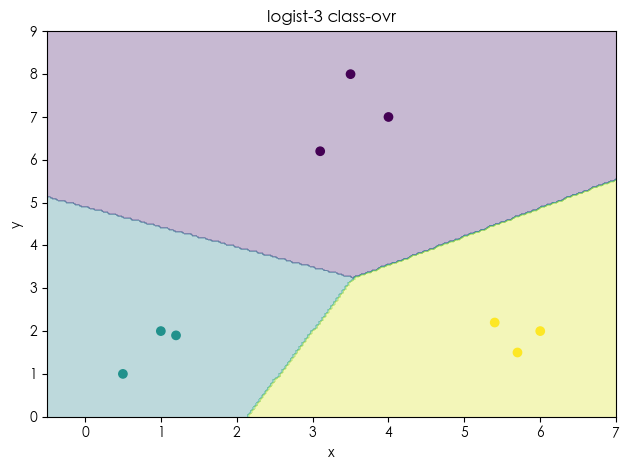

In [5]:
## 多元分类概率问题
## one vs rest (ovr) : 1对多。概率和>1
## softmax 概率和=1
x = np.array([
    [4, 7],
    [3.5, 8],
    [3.1, 6.2],
    [0.5, 1],
    [1, 2],
    [1.2, 1.9],
    [6, 2,],
    [5.7, 1.5],
    [5.4, 2.2],
])

y = np.array([0,0,0,1,1,1,2,2,2])

import sklearn.linear_model as sl
model = sl.LogisticRegression(solver='liblinear', C = 500)
model.fit(x, y)
### 这里可以打印出预测的每个类别的概率,从结果也可以看出,3种类别的概率和大于1
### 这是因为solver='liblinear'时,它的多分类multi_class会自动选择ovr--可以看下面介绍
### 其他情况一般都会选择softmax
print(model.predict_proba(x))
print(model.predict(x))
l, r = x[:, 0].min() -1, x[:, 0].max() + 1
b, t = x[:, 1].min() -1, x[:, 1].max() + 1
n = 200
xs, ys = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
X = np.column_stack((xs.ravel(), ys.ravel()))
zs = model.predict(X)
zs = zs.reshape(xs.shape)
print()
plt.figure()
plt.title('logist-3 class-ovr')
plt.contourf(xs, ys, zs, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

[[9.99992557e-01 7.44314095e-06 7.45341289e-22]
 [9.99999365e-01 6.34800397e-07 9.53106871e-28]
 [9.99708125e-01 2.91875150e-04 3.74911683e-20]
 [1.05237167e-05 9.99987929e-01 1.54684690e-06]
 [4.56032552e-04 9.99543950e-01 1.78096068e-08]
 [4.33788350e-04 9.99566065e-01 1.46520216e-07]
 [6.61237089e-08 2.09737220e-07 9.99999724e-01]
 [1.40743162e-09 3.13798066e-08 9.99999967e-01]
 [1.43803522e-05 5.36058514e-05 9.99932014e-01]]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 0 0 1 1 1 2 2 2]


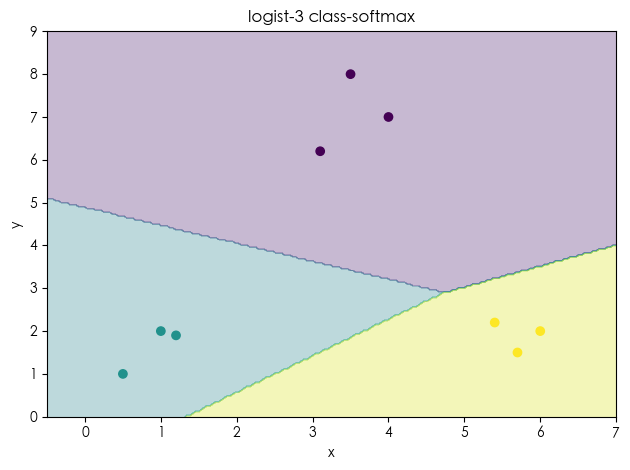

In [6]:
x = np.array([
    [4, 7],
    [3.5, 8],
    [3.1, 6.2],
    [0.5, 1],
    [1, 2],
    [1.2, 1.9],
    [6, 2,],
    [5.7, 1.5],
    [5.4, 2.2],
])

y = np.array([0,0,0,1,1,1,2,2,2])

import sklearn.linear_model as sl
model = sl.LogisticRegression(solver='lbfgs', C = 10000)
model.fit(x, y)
### 这里可以打印出预测的每个类别的概率,从结果也可以看出,3种类别的概率和大于1
### 这是因为solver='liblinear'时,它的多分类multi_class会自动选择ovr--可以看下面介绍
### 其他情况一般都会选择softmax
proba = model.predict_proba(x)
print(proba)
print(np.sum(proba, axis=1))
print(model.predict(x))
l, r = x[:, 0].min() -1, x[:, 0].max() + 1
b, t = x[:, 1].min() -1, x[:, 1].max() + 1
n = 200
xs, ys = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
X = np.column_stack((xs.ravel(), ys.ravel()))
zs = model.predict(X)
zs = zs.reshape(xs.shape)
plt.figure()
plt.title('logist-3 class-softmax')
plt.contourf(xs, ys, zs, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()